## Customer Churn Prediction Modeling


In [31]:
# Load Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.inspection import permutation_importance

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
# Import the dataset
df = pd.read_csv("Churn_Modelling.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### EDA

In [35]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

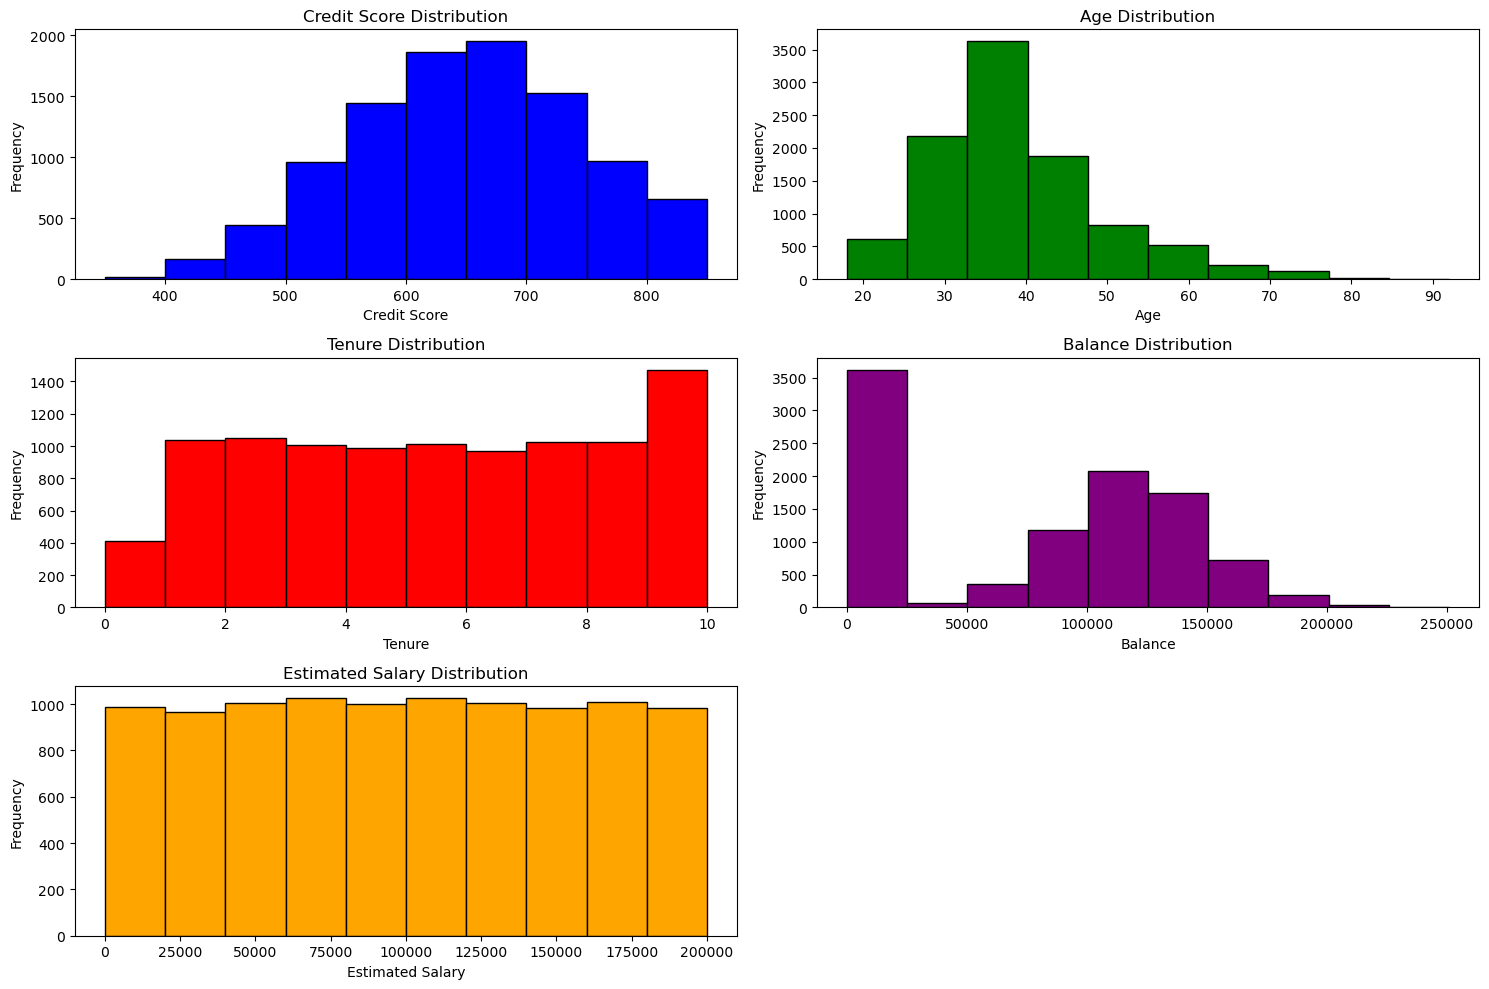

In [38]:
# Check the distribution of some variables

plt.figure(figsize=(15, 10))  # Set the figure size

# Plot for 'CreditScore'
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, position 1
plt.hist(df['CreditScore'], color='blue', edgecolor='black')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

# Plot for 'Age'
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, position 2
plt.hist(df['Age'], color='green', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot for 'Tenure'
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, position 3
plt.hist(df['Tenure'], color='red', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

# Plot for 'Balance'
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, position 4
plt.hist(df['Balance'], color='purple', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Plot for 'EstimatedSalary'
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, position 5
plt.hist(df['EstimatedSalary'], color='orange', edgecolor='black')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

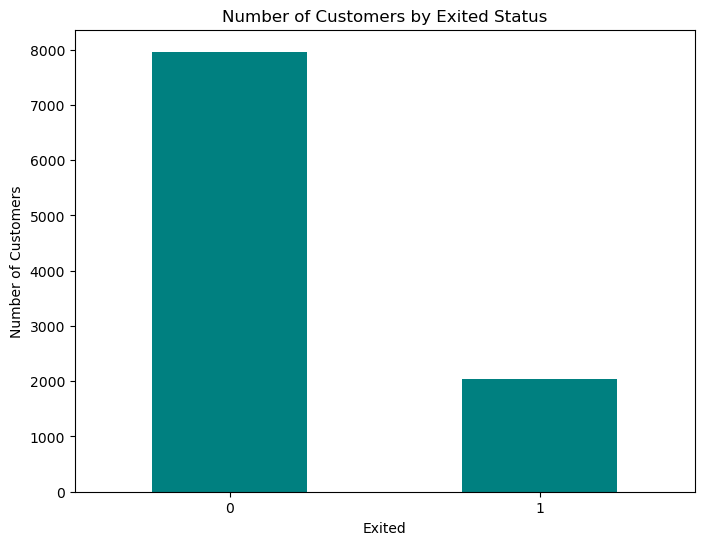

In [40]:
# Count the number of 'CustomerId' for each 'Exited'
customer_counts = df.groupby('Exited')['CustomerId'].count()

# Plotting the result as a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
customer_counts.plot(kind='bar', color='teal')
plt.title('Number of Customers by Exited Status')
plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) 
plt.show()

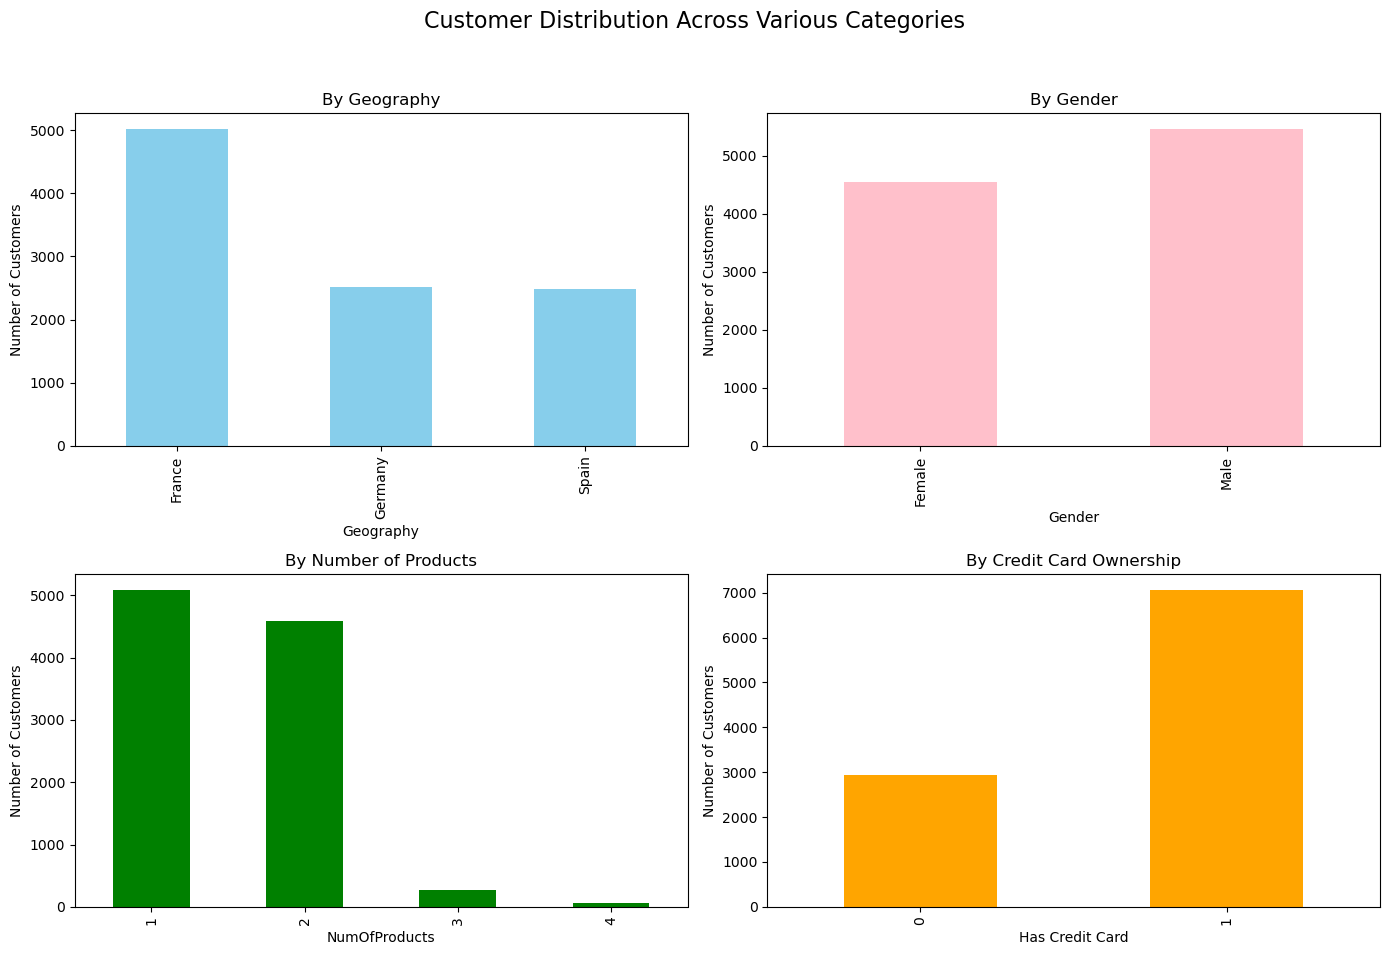

In [41]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # Create 2x2 grid of subplots
fig.suptitle('Customer Distribution Across Various Categories', fontsize=16)

# Count the number of 'CustomerId' for each 'Geography' and plot
geo_counts = df.groupby('Geography')['CustomerId'].count()
geo_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue', title='By Geography')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].set_xlabel('Geography')

# Count the number of 'CustomerId' for each 'Gender' and plot
gender_counts = df.groupby('Gender')['CustomerId'].count()
gender_counts.plot(kind='bar', ax=axes[0, 1], color='pink', title='By Gender')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].set_xlabel('Gender')

# Count the number of 'CustomerId' for each 'NumOfProducts' and plot
products_counts = df.groupby('NumOfProducts')['CustomerId'].count()
products_counts.plot(kind='bar', ax=axes[1, 0], color='green', title='By Number of Products')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_xlabel('NumOfProducts')

# Count the number of 'CustomerId' for each 'HasCrCard' and plot
ccard_counts = df.groupby('HasCrCard')['CustomerId'].count()
ccard_counts.plot(kind='bar', ax=axes[1, 1], color='orange', title='By Credit Card Ownership')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].set_xlabel('Has Credit Card')

# Adjust layout to prevent overlap and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

##### 1. Develop ML models in Python, using Jupyter Notebook or any other tool of your choice. Apply any three classification algorithms of your choice (example LogisticRegression, SVM, RandomForest). Apply Data Science Process Model as a guide. (11 points)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Exited column will be outcome
# There are redundant features: RowNumber, CustomerId, Surname

# Save Exited as y and Other features as X 
X = df.iloc[:,[3,4,5,6,7,8,9,10,11,12]]
y = df['Exited']

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
# Convert categorical variables to dummies 
X = pd.get_dummies(X, drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
# split the dataset into test and train set 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

##### (1) Decision Tree

In [33]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state = 42)

# Set the parameters for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best score: 0.8442857142857143


In [34]:
# Fit the model using the best parameter set
dt = DecisionTreeClassifier(**best_params, random_state=42)

dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  # Calculate ROC AUC score

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8476666666666667
Confusion Matrix:
 [[2262  154]
 [ 303  281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2416
           1       0.65      0.48      0.55       584

    accuracy                           0.85      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000

ROC AUC Score: 0.7961031763131634


##### (2) Random Forest

In [23]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
176 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constrai

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.8642857142857142


In [24]:
# Using the best parameters to fit the model
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.868
Confusion Matrix:
 [[2337   79]
 [ 317  267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

ROC AUC Score: 0.8643744897033476


##### (3) XGBoost

In [29]:
# Initialize the XGBoost Classifier
xg_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7],
    'subsample': [0.7, 0.9]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xg_clf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/jihyunkim/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best score: 0.8617142857142858


In [30]:
# Using the best parameters to fit the model
best_xg_clf = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xg_clf.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred = best_xg_clf.predict(X_test)
y_proba = best_xg_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8723333333333333
Confusion Matrix:
 [[2333   83]
 [ 300  284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.77      0.49      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

ROC AUC Score: 0.8704452480041731


                   Importance
NumOfProducts        0.261694
IsActiveMember       0.189481
Age                  0.187440
Geography_Germany    0.094734
Balance              0.063560
Gender_Male          0.058126
Geography_Spain      0.031564
CreditScore          0.029267
Tenure               0.028451
HasCrCard            0.028241
EstimatedSalary      0.027443


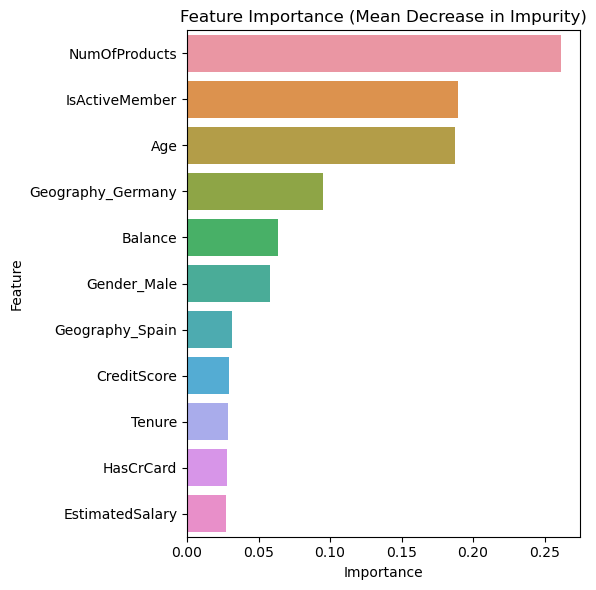

In [45]:
# Feature importance
# feature_importances_ feature of sklearn directly calculate these importances
feature_importances_mdi = best_xg_clf.feature_importances_ 

# Print the importances, in descending order
feature_names = X.columns
feature_importances_mdi_f = pd.DataFrame(feature_importances_mdi, index=feature_names, columns=["Importance"]).sort_values("Importance", ascending=False)

pd.set_option('display.max_rows', None)
print(feature_importances_mdi_f)
pd.reset_option('display.max_rows')

# visualize with bar plot
# Reset the indice
feature_importances_mdi_f_reset = feature_importances_mdi_f.reset_index()
feature_importances_mdi_f_reset.columns = ['Feature', 'Importance']

# plot a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature',  data=feature_importances_mdi_f_reset, orient='h')
plt.title('Feature Importance (Mean Decrease in Impurity)')
plt.tight_layout() 
plt.show()

##### Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact viewpoint (false negatives vs false positives). (2 points)

**Model Performance Summary:**

1. Decision Tree:
- Accuracy: 84.8%
- Precision (Class 1): 0.65
- Recall (Class 1): 0.48
- ROC AUC Score: 0.797

2. Random Forest:
- Accuracy: 86.8%
- Precision (Class 1): 0.77
- Recall (Class 1): 0.46
- ROC AUC Score: 0.864

3. XGBoost:
- Accuracy: 87.2%
- Precision (Class 1): 0.77
- Recall (Class 1): 0.49
- ROC AUC Score: 0.870

**Interpretation and Business Impact:**
- Accuracy: XGBoost slightly outperforms the other models in terms of overall accuracy, making it the most generally correct model among the three.

- Precision and Recall: 

Decision Tree shows the lowest precision and recall for class 1. It tends to misclassify a higher number of both false positives and false negatives compared to other models.
Random Forest and XGBoost exhibit higher precision, which means they are more reliable when they predict that a customer will churn. They reduce the risk of misallocating resources towards customers who are not at risk. XGBoost provides a slightly better balance between precision and recall compared to Random Forest, indicating a slightly higher ability to identify true churners without increasing false positives significantly.

- ROC AUC Score: 

This metric provides an aggregate measure of performance across all possible classification thresholds. XGBoost leads with the highest ROC AUC score, indicating its superior ability to distinguish between the two classes across all thresholds.

- Confusion Matrix Analysis:

False Negatives (Type II Error): This is critical in scenarios where failing to identify a churner could result in lost revenue and customer dissatisfaction. XGBoost has the lowest number of false negatives among the models, making it potentially the best model for minimizing missed opportunities to retain churners.

False Positives (Type I Error): Random Forest has the lowest number, but only slightly better than XGBoost, suggesting both models manage resources well by not targeting as many non-churners unnecessarily.

**Conclusion:**
Given the context of minimizing both types of errors but particularly focusing on reducing false negatives to avoid missed opportunities for intervention, XGBoost appears to be the most balanced choice. It combines high accuracy, the best ROC AUC score, a good balance in precision and recall, and a manageable number of false positives. This makes it potentially the most effective model for proactive churn management strategies, assuming the cost implications of false predictions are considered and found acceptable for the business's specific needs.